In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

In [67]:
# define the color ranges
colorRanges = [
    ((29, 86, 6), (64, 255, 255), "blue")]
#     ((57, 68, 0), (151, 255, 255), "blue")]

In [73]:
video = cv2.VideoCapture('snooker_clip.mp4')

(400, 400, 3)
0


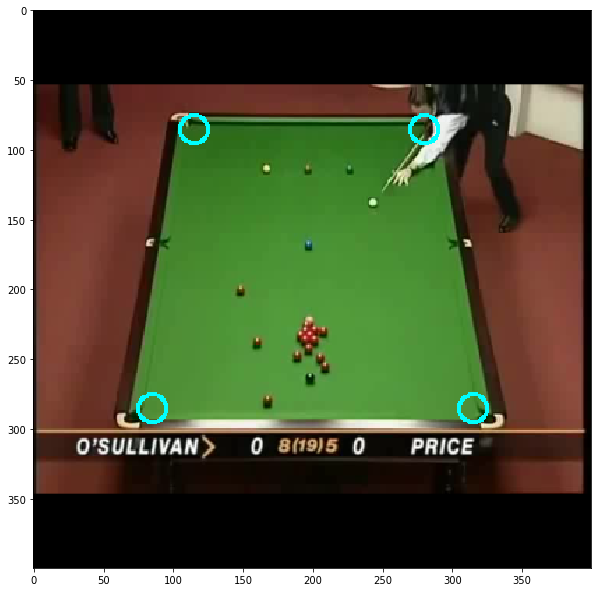

In [74]:
i=0
while True:
    (grabbed,frame) = video.read()
    resized = cv2.resize(frame,(400,400),interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(resized.copy(),cv2.COLOR_RGB2BGR)
    
    #Plotting the locations the four corners of the table@
    cv2.circle(img, (115, 85), 10, (0, 255, 255), 2)
    cv2.circle(img, (280, 85), 10, (0, 255, 255), 2)
    cv2.circle(img, (85, 285), 10, (0, 255, 255), 2)
    cv2.circle(img, (315,285), 10, (0, 255, 255), 2)
    
#     blurred = cv2.GaussianBlur(dst, (2, 2), 0)
    hsv = cv2.cvtColor(dst.copy(), cv2.COLOR_BGR2HSV)
    plt.figure(figsize=(10,20))
#     plt.imshow(img)
    
        
    plt.imshow(img)
    print(img.shape)
    print(i)
    i += 1
    if i == 1:
        break
#     i += 1

(400, 400, 3)
0


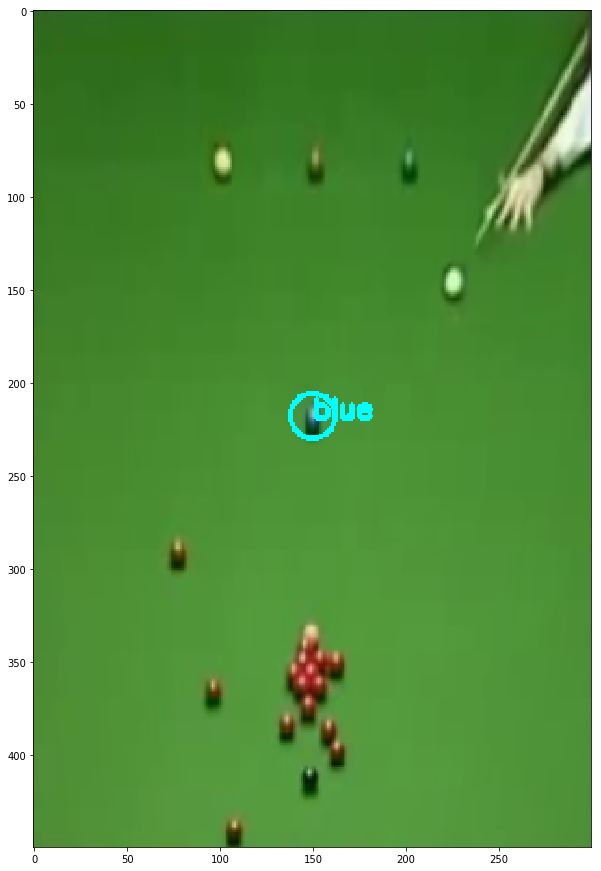

In [77]:
i=0
while True:
    (grabbed,frame) = video.read()
    resized = cv2.resize(frame,(400,400),interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(resized.copy(),cv2.COLOR_RGB2BGR)
    
#     img = cv2.cvtColor(resized.copy(), cv2.COLOR_BGR2HSV)
    
    
    pts1 = np.float32([[110,85],[280,85],[85,285],[315,285]])
    pts2 = np.float32([[0,0],[300,0],[0,450],[300,450]])
    
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img,M,(300,450))

#     blurred = cv2.GaussianBlur(dst, (2, 2), 0)
    hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)
    
    
    # loop over the color ranges
    for (lower, upper, colorName) in colorRanges:
        # construct a mask for all colors in the current HSV range, then
        # perform a series of dilations and erosions to remove any small
        # blobs left in the mask
        mask = cv2.inRange(hsv, lower, upper)
        mask = cv2.erode(mask, None, iterations=2)
        mask = cv2.dilate(mask, None, iterations=2)

        # find contours in the mask
        (_,cnts,_) = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
                                              cv2.CHAIN_APPROX_SIMPLE)
        
        # only proceed if at least one contour was found
        if len(cnts) > 0:
            # find the largest contour in the mask, then use it to compute
            # the minimum enclosing circle and centroid
            c = max(cnts, key=cv2.contourArea)
            ((x, y), radius) = cv2.minEnclosingCircle(c)
            M = cv2.moments(c)
            (cX, cY) = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

            # only draw the enclosing circle and text if the radious meets
            # a minimum size
            if radius > 1:
                cv2.circle(dst, (int(x), int(y)), int(radius), (0, 255, 255), 2)
                cv2.putText(dst, colorName, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
                            0.5, (0, 255, 255), 2)
    
    
    
    
    plt.figure(figsize=(10,20))
#     plt.imshow(img)
    
        
    plt.imshow(dst)
    print(img.shape)
    print(i)
    i += 1
    if i == 1:
        break
#     i += 1

In [12]:
#References:

#https://stackoverflow.com/questions/28113221/findcontours-and-drawcontours-errors-in-opencv-3-beta-python#31865966
#pyimagsearch gurus